# Recolección de datos electorales en Ecuador año 2002 (1era vuelta)

Empezamos recolectando la información de las elecciones correspondientes al año 2002 de la página oficial del [CNE](http://cne.gob.ec/es/estadisticas/bases-de-datos)

Nos dirigimos a la carpeta de elecciones generales del año 2006, y recopilamos la información necesaria. Una vez descargados los archivos y exportados en formato csv, procedemos a subirlos a nuestro notebook.

## Descargando las bibliotecas necesarias para trabajar y limpiando las tablas

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib as mp 
import matplotlib.pyplot as plt

In [3]:
os.chdir(r"C:\Users\HP\Documents\GitHub\Proyecto_Datos_Elecciones_Ecuador_2002_2017\2002\1era vuelta")
df_p2002=pd.read_csv('parroquias 2002.csv')
df_p2002.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE,CANTON_CODIGO,CANTON_NOMBRE,PARROQUIA_CODIGO,PARROQUIA_NOMBRE,PARROQUIA_ESTADO
0,1,AZUAY,260,CUENCA,285,BANOS,RURAL
1,1,AZUAY,260,CUENCA,730,CUMBE,RURAL
2,1,AZUAY,260,CUENCA,845,CHAUCHA/ANGAS,RURAL
3,1,AZUAY,260,CUENCA,860,CHECA JIDCAY,RURAL
4,1,AZUAY,260,CUENCA,905,CHIQUINTAD,RURAL


In [26]:
df_c2002=pd.read_csv('candidatos2002.csv')
df_c2002.head()

,DIGNIDAD_CODIGO,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_ORDEN,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANDIDATO_SEXO,CANDIDATO_EDAD_EXACTA,CANDIDATO_GRUPOS_DE_EDAD,SUPLENTE_NOMBRE.1,SUPLENTE_SEXO.1,SUPLENTE_EDAD_EXACTA.1,SUPLENTE_GRUPOS_DE_EDAD.1,SUPLENTE_NOMBRE.2,SUPLENTE_SEXO.2,SUPLENTE_EDAD_EXACTA.2,SUPLENTE_GRUPOS_DE_EDAD.2
0,1,201,1000000000001,1,0,0,0,JUEZ ABUCHAKRA IVONNE LEYLA,2,51.654795,3,FRIXONE FRANCO CESAR NICOLAS,1,67.37534246575342,4,NaN,,,
1,1,202,1000000000002,1,0,0,0,GUTIERREZ BORBUA LUCIO EDWIN,1,45.578082,3,PALACIO GONZALEZ LUIS ALFREDO,1,63.74246575342466,3,NaN,,,
2,1,6,1000000000003,1,0,0,0,NEIRA MENENDEZ ANTONIO XAVIER,1,55.238356,3,PEREZ INTRIAGO ALVARO PATRICIO ALFREDO,1,66.19398907103825,4,NaN,,,
3,1,7,1000000000004,1,0,0,0,NOBOA PONTON ALVARO FERNANDO,1,51.912329,3,CRUZ UTRERAS MARCELO EDUARDO,1,59.38082191780822,3,NaN,,,
4,1,10,1000000000005,1,0,0,0,BUCARAM ORTIZ JACOBO,1,55.210959,3,VARGAS PAZZOS FRANK ENRIQUE,1,68.26575342465753,4,NaN,,,


In [5]:
df_1V2002=pd.read_csv('RESULTADOS_1V_PARROQUIA_2002.csv', low_memory=False)
df_1V2002.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,SEXO,NUMERO_DE_ACTAS,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,OP_VOTOS_EN_PLANCHA,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,1,260,285,2,31,204,381,201,0,1000000000001,59,#NULL!
1,1,1,260,285,2,31,204,381,202,0,1000000000002,637,1
2,1,1,260,285,2,31,204,381,6,0,1000000000003,111,#NULL!
3,1,1,260,285,2,31,204,381,7,0,1000000000004,337,#NULL!
4,1,1,260,285,2,31,204,381,10,0,1000000000005,142,#NULL!


Antes de nada, procedemos a limpiar la tabla de candidatos. Analizamos sus columnas primero.

In [6]:
df_c2002.dtypes

DIGNIDAD_CODIGO                 int64
OP_CODIGO                       int64
CANDIDATO_CODIGO                int64
CANDIDATO_ORDEN                 int64
CANDIDATO_PROVINCIA_CODIGO      int64
CANDIDATO_CANTON_CODIGO         int64
CANDIDATO_PARROQUIA_CODIGO      int64
CANDIDATO_NOMBRE               object
CANDIDATO_SEXO                  int64
CANDIDATO_EDAD_EXACTA         float64
CANDIDATO_GRUPOS_DE_EDAD        int64
SUPLENTE_NOMBRE.1              object
SUPLENTE_SEXO.1                object
SUPLENTE_EDAD_EXACTA.1         object
SUPLENTE_GRUPOS_DE_EDAD.1      object
SUPLENTE_NOMBRE.2              object
SUPLENTE_SEXO.2                object
SUPLENTE_EDAD_EXACTA.2         object
SUPLENTE_GRUPOS_DE_EDAD.2      object
dtype: object

In [31]:
df_c2002=df_c2002.drop(['SUPLENTE_NOMBRE.1','CANDIDATO_GRUPOS_DE_EDAD','CANDIDATO_EDAD_EXACTA','CANDIDATO_SEXO'],axis=1)
df_c2002.head()

,DIGNIDAD_CODIGO,CANDIDATO_CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1000000000001,0,0,0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,1000000000002,0,0,0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1000000000003,0,0,0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,1000000000004,0,0,0,NOBOA PONTON ALVARO FERNANDO
4,1,1000000000005,0,0,0,BUCARAM ORTIZ JACOBO


In [32]:
df_c2002.dtypes

DIGNIDAD_CODIGO                int64
CANDIDATO_CODIGO               int64
CANDIDATO_PROVINCIA_CODIGO     int64
CANDIDATO_CANTON_CODIGO        int64
CANDIDATO_PARROQUIA_CODIGO     int64
CANDIDATO_NOMBRE              object
dtype: object

De la tabla de resultados, también eliminamos las columnas sin importancia.

In [12]:
df_1V2002.dtypes

DIGNIDAD_CODIGO         int64
PROVINCIA_CODIGO        int64
CANTON_CODIGO           int64
PARROQUIA_CODIGO        int64
SEXO                    int64
NUMERO_DE_ACTAS         int64
VOTOS_EN_BLANCO         int64
VOTOS_NULOS             int64
OP_CODIGO               int64
OP_VOTOS_EN_PLANCHA     int64
CANDIDATO_CODIGO        int64
CANDIDATO_VOTOS         int64
CANDIDATO_ESTADO       object
dtype: object

In [14]:
df_1V2002=df_1V2002.drop(['OP_VOTOS_EN_PLANCHA','SEXO','NUMERO_DE_ACTAS'], axis=1)
df_1V2002.head()

,DIGNIDAD_CODIGO,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO
0,1,1,260,285,204,381,201,1000000000001,59,#NULL!
1,1,1,260,285,204,381,202,1000000000002,637,1
2,1,1,260,285,204,381,6,1000000000003,111,#NULL!
3,1,1,260,285,204,381,7,1000000000004,337,#NULL!
4,1,1,260,285,204,381,10,1000000000005,142,#NULL!


Una vez reducidas la cantidad de columnas, verificamos la probabilidad de datos duplicados en nuestra tabla.

In [15]:
df_1V2002.count()

DIGNIDAD_CODIGO     642946
PROVINCIA_CODIGO    642946
CANTON_CODIGO       642946
PARROQUIA_CODIGO    642946
VOTOS_EN_BLANCO     642946
VOTOS_NULOS         642946
OP_CODIGO           642946
CANDIDATO_CODIGO    642946
CANDIDATO_VOTOS     642946
CANDIDATO_ESTADO    642946
dtype: int64

Por lo visto no existen filas duplicadas, por lo que continuamos con nuestra depuración. Una vez eliminadas las filas duplicadas, revisamos si existan filas que posean datos nulos. Utilizamos el siguiente código.

In [16]:
print(df_1V2002.isnull().sum())

DIGNIDAD_CODIGO     0
PROVINCIA_CODIGO    0
CANTON_CODIGO       0
PARROQUIA_CODIGO    0
VOTOS_EN_BLANCO     0
VOTOS_NULOS         0
OP_CODIGO           0
CANDIDATO_CODIGO    0
CANDIDATO_VOTOS     0
CANDIDATO_ESTADO    0
dtype: int64


Por lo visto no existen datos nulos, por lo que continuamos con el arreglo de nuestras tablas de información.

## Agrupación de datos por candidato

Antes de contar votos por candidato, procedemos a unir las tablas necesarias. Para eliminar inconsistencias de la columna de candidatos, cambiamos el nombre de la columna codigo candidato. Comenzamos uniendo las tablas correspondientes

In [33]:
df_c2002.rename(columns={'CANDIDATO_CODIGO':'CODIGO'}, inplace=True)
df_c2002.head()

,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1000000000001,0,0,0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,1000000000002,0,0,0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1000000000003,0,0,0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,1000000000004,0,0,0,NOBOA PONTON ALVARO FERNANDO
4,1,1000000000005,0,0,0,BUCARAM ORTIZ JACOBO


Ordenamos nuestra tabla por codigo

In [35]:
df_c2002.sort_values(['DIGNIDAD_CODIGO'], ascending=True, inplace=True)
df_c2002=df_c2002.head(11)
df_c2002

,DIGNIDAD_CODIGO,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1000000000001,0,0,0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,1000000000002,0,0,0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1000000000003,0,0,0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,1000000000004,0,0,0,NOBOA PONTON ALVARO FERNANDO
4,1,1000000000005,0,0,0,BUCARAM ORTIZ JACOBO
5,1,1000000000006,0,0,0,ALARCON COSTTA CESAR AUGUSTO
6,1,1000000000007,0,0,0,BORJA CEVALLOS RODRIGO
7,1,1000000000008,0,0,0,VELAZQUEZ HERRERA JACINTO
8,1,1000000000009,0,0,0,HURTADO LARREA OSVALDO
9,1,1000000000010,0,0,0,VARGAS GUATATUCA CARLOS ANTONIO


In [36]:
df_rp=pd.merge(left=df_1V2002, right=df_c2002, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_rp

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,1,260,285,204,381,202,1000000000002,637,1,1.0,1.000000e+12,0.0,0.0,0.0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,204,381,6,1000000000003,111,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,1,260,285,204,381,7,1000000000004,337,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
4,1,1,260,285,204,381,10,1000000000005,142,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,BUCARAM ORTIZ JACOBO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
642941,8,22,935,6455,278,230,28,8000000000076,0,#NULL!,NaN,NaN,NaN,NaN,NaN,NaN
642942,8,22,935,6455,278,230,28,8000000000077,0,#NULL!,NaN,NaN,NaN,NaN,NaN,NaN
642943,8,22,935,6455,278,230,28,8000000000078,0,#NULL!,NaN,NaN,NaN,NaN,NaN,NaN
642944,8,22,935,6455,278,230,28,8000000000079,0,#NULL!,NaN,NaN,NaN,NaN,NaN,NaN


La tabla se ve mucho mejor, por lo que ahora agrupamos los votos por candidato.

In [39]:
df_rp=df_rp.groupby('CANDIDATO_NOMBRE')['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_rp

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
ALARCON COSTTA CESAR AUGUSTO,245494,483905,54793
BORJA CEVALLOS RODRIGO,245494,483905,638142
BUCARAM ORTIZ JACOBO,245494,483905,544688
GUTIERREZ BORBUA LUCIO EDWIN,245494,483905,943123
HURTADO LARREA OSVALDO,245494,483905,49043
JUEZ ABUCHAKRA IVONNE LEYLA,245494,483905,79598
NEIRA MENENDEZ ANTONIO XAVIER,245494,483905,553106
NOBOA PONTON ALVARO FERNANDO,245494,483905,794614
ROLDOS AGUILERA LEON,245494,483905,703593


Realizamos un gráfico de pastel para poder visibilizar mejor la información.

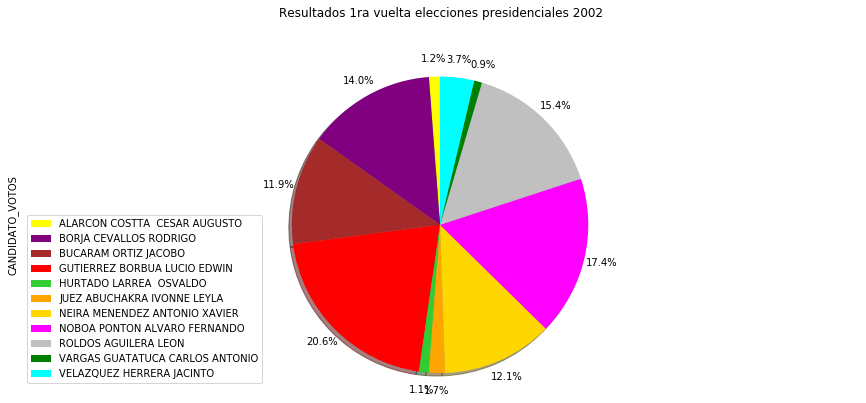

In [41]:
Colores= ['yellow','purple','brown','red','limegreen','orange','gold','magenta','silver','green','cyan']

df_rp['CANDIDATO_VOTOS'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,
                            colors=Colores,
                            pctdistance=1.12,
                            )

# Título del gráfico
plt.title('Resultados 1ra vuelta elecciones presidenciales 2002', y=1.12) 

plt.axis('equal') 

# Añadir leyenda
plt.legend(labels=df_rp.index, loc='lower left') 

plt.show()

Procedemos a exportar la información 

In [42]:
df_rp.to_excel('Resultados V1 2002.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_rp 

exportación exitosa


## Agrupación de datos por provincia

Procedemos nuevamente a unir las tablas correspondientes para poder aislar los datos que necesitamos.

In [43]:
df_prov=df_p2002.drop(['CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_prov.head()

,PROVINCIA_CODIGO,PROVINCIA_NOMBRE
0,1,AZUAY
1,1,AZUAY
2,1,AZUAY
3,1,AZUAY
4,1,AZUAY


In [44]:
df_p=pd.merge(left=df_1V2002, right=df_c2002, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,1,260,285,204,381,202,1000000000002,637,1,1.0,1.000000e+12,0.0,0.0,0.0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,204,381,6,1000000000003,111,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,1,260,285,204,381,7,1000000000004,337,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
4,1,1,260,285,204,381,10,1000000000005,142,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,BUCARAM ORTIZ JACOBO


In [45]:
df_p=df_p.dropna()
print(df_p.isnull().sum())

DIGNIDAD_CODIGO_x             0
PROVINCIA_CODIGO              0
CANTON_CODIGO                 0
PARROQUIA_CODIGO              0
VOTOS_EN_BLANCO               0
VOTOS_NULOS                   0
OP_CODIGO                     0
CANDIDATO_CODIGO              0
CANDIDATO_VOTOS               0
CANDIDATO_ESTADO              0
DIGNIDAD_CODIGO_y             0
CODIGO                        0
CANDIDATO_PROVINCIA_CODIGO    0
CANDIDATO_CANTON_CODIGO       0
CANDIDATO_PARROQUIA_CODIGO    0
CANDIDATO_NOMBRE              0
dtype: int64


In [47]:
df_p=pd.merge(left=df_p, right=df_prov, how='left', left_on='PROVINCIA_CODIGO', right_on='PROVINCIA_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,PROVINCIA_NOMBRE
0,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,AZUAY
1,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,AZUAY
2,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,AZUAY
3,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,AZUAY
4,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,AZUAY


In [49]:
df_prov1=df_p.groupby(['PROVINCIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_prov1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                                   
AZUAY            ALARCON COSTTA  CESAR AUGUSTO            1154736   
                 BORJA CEVALLOS RODRIGO                   1154736   
                 BUCARAM ORTIZ JACOBO                     1154736   
                 GUTIERREZ BORBUA LUCIO EDWIN             1154736   
                 HURTADO LARREA  OSVALDO                  1154736   
...                                                           ...   
ZAMORA CHINCHIPE NEIRA MENENDEZ ANTONIO XAVIER              84351   
                 NOBOA PONTON ALVARO FERNANDO               84351   
                 ROLDOS AGUILERA LEON                       84351   
                 VARGAS GUATATUCA CARLOS ANTONIO            84351   
                 VELAZQUEZ HERRERA JACINTO                  84351   

                                                  VOTOS_NULOS  CANDIDATO_VOTOS  
PROVINCIA_NOMBRE CANDIDATO_NOMBRE                                               
AZUAY            ALARCON COSTTA  CESAR AUGUSTO        1922448           149600  
                 BORJA CEVALLOS RODRIGO               1922448          6918824  
                 BUCARAM ORTIZ JACOBO                 1922448           915288  
                 GUTIERREZ BORBUA LUCIO EDWIN         1922448          4244680  
                 HURTADO LARREA  OSVALDO              1922448           262856  
...                                                       ...              ...  
ZAMORA CHINCHIPE NEIRA MENENDEZ ANTONIO XAVIER          53630            55676  
                 NOBOA PONTON ALVARO FERNANDO           53630           114018  
                 ROLDOS AGUILERA LEON                   53630           102610  
                 VARGAS GUATATUCA CARLOS ANTONIO        53630             4061  
                 VELAZQUEZ HERRERA JACINTO              53630             4774  

[242 rows x 3 columns]

Para poder visualizar mejor la información, procedemos a realizar un gráfico de barras con la tabla obtenida

In [50]:
df_prov2=df_prov1['CANDIDATO_VOTOS']
df_prov2=df_prov1.unstack(level=[1])

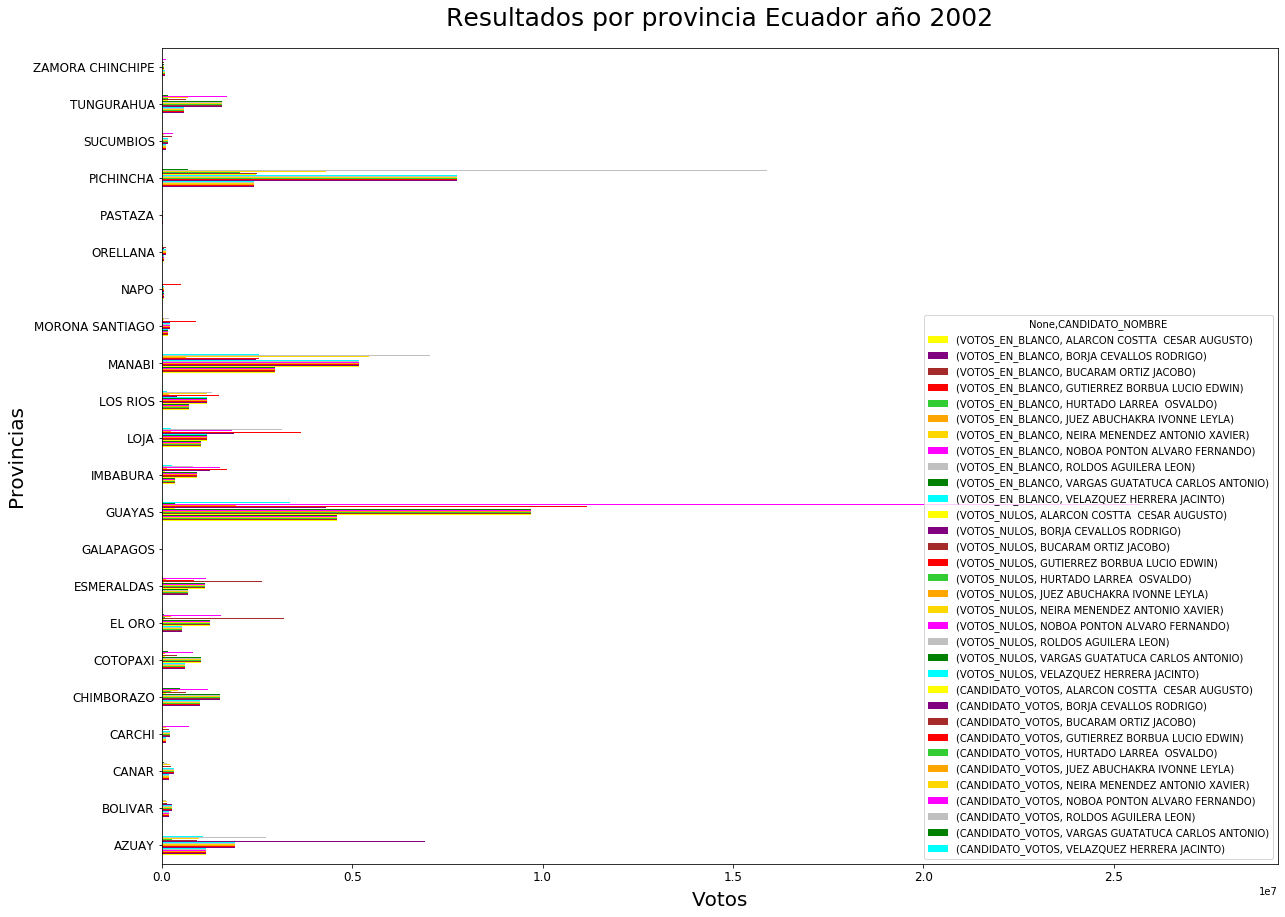

In [51]:
df_prov2.plot(kind='barh', figsize=(20,15), label=None, color=Colores)

plt.xlabel('Votos', fontsize=20, labelpad= 7)
plt.ylabel('Provincias', fontsize=20, labelpad= 7)
plt.title('Resultados por provincia Ecuador año 2002', fontsize=25, y=1.02)
plt.tick_params(labelsize=12)

plt.show()

In [52]:
df_prov1.to_excel('Resultados V1 provinciales 2002.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_prov1
del df_prov2

exportación exitosa


## Agrupando los votos por canton

Nuevamente nos centramos en reunir la información en una sola tabla, esta vez voy a organizar los votos por cantón. Vamos a utilizar la misma tabla unificada, pero esta vez vamos a agrupar la información por cantón y nombre de candidato.

In [53]:
df_cant=df_p2002.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','PARROQUIA_CODIGO','PARROQUIA_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_cant.head()

,CANTON_CODIGO,CANTON_NOMBRE
0,260,CUENCA
1,260,CUENCA
2,260,CUENCA
3,260,CUENCA
4,260,CUENCA


In [55]:
df_p=pd.merge(left=df_1V2002, right=df_c2002, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,1,260,285,204,381,202,1000000000002,637,1,1.0,1.000000e+12,0.0,0.0,0.0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,204,381,6,1000000000003,111,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,1,260,285,204,381,7,1000000000004,337,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
4,1,1,260,285,204,381,10,1000000000005,142,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,BUCARAM ORTIZ JACOBO


In [56]:
df_p=df_p.drop(['PROVINCIA_CODIGO','PARROQUIA_CODIGO','OP_CODIGO'], axis=1)
df_p.head()

,DIGNIDAD_CODIGO_x,CANTON_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,260,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,260,204,381,1000000000002,637,1,1.0,1.000000e+12,0.0,0.0,0.0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,260,204,381,1000000000003,111,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,260,204,381,1000000000004,337,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
4,1,260,204,381,1000000000005,142,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,BUCARAM ORTIZ JACOBO


In [57]:
df_p=df_p.dropna()
print(df_p.isnull().sum())

DIGNIDAD_CODIGO_x             0
CANTON_CODIGO                 0
VOTOS_EN_BLANCO               0
VOTOS_NULOS                   0
CANDIDATO_CODIGO              0
CANDIDATO_VOTOS               0
CANDIDATO_ESTADO              0
DIGNIDAD_CODIGO_y             0
CODIGO                        0
CANDIDATO_PROVINCIA_CODIGO    0
CANDIDATO_CANTON_CODIGO       0
CANDIDATO_PARROQUIA_CODIGO    0
CANDIDATO_NOMBRE              0
dtype: int64


In [59]:
df_p=pd.merge(left=df_p, right=df_cant, how='left', left_on='CANTON_CODIGO', right_on='CANTON_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,CANTON_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,CANTON_NOMBRE
0,1,260,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,CUENCA
1,1,260,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,CUENCA
2,1,260,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,CUENCA
3,1,260,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,CUENCA
4,1,260,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,CUENCA


In [61]:
df_cant1=df_p.groupby(['CANTON_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_cant1

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  VOTOS_NULOS  \
CANTON_NOMBRE CANDIDATO_NOMBRE                                                
24 DE MAYO    ALARCON COSTTA  CESAR AUGUSTO               5532         7228   
              BORJA CEVALLOS RODRIGO                      5532         7228   
              BUCARAM ORTIZ JACOBO                        5532         7228   
              GUTIERREZ BORBUA LUCIO EDWIN                5532         7228   
              HURTADO LARREA  OSVALDO                     5532         7228   
...                                                        ...          ...   
ZARUMA        NEIRA MENENDEZ ANTONIO XAVIER               4860         8920   
              NOBOA PONTON ALVARO FERNANDO                4860         8920   
              ROLDOS AGUILERA LEON                        4860         8920   
              VARGAS GUATATUCA CARLOS ANTONIO             4860         8920   
              VELAZQUEZ HERRERA JACINTO                   4860         8920   

                                               CANDIDATO_VOTOS  
CANTON_NOMBRE CANDIDATO_NOMBRE                                  
24 DE MAYO    ALARCON COSTTA  CESAR AUGUSTO                260  
              BORJA CEVALLOS RODRIGO                      2732  
              BUCARAM ORTIZ JACOBO                       12472  
              GUTIERREZ BORBUA LUCIO EDWIN                2940  
              HURTADO LARREA  OSVALDO                      208  
...                                                        ...  
ZARUMA        NEIRA MENENDEZ ANTONIO XAVIER               7350  
              NOBOA PONTON ALVARO FERNANDO                7930  
              ROLDOS AGUILERA LEON                       31230  
              VARGAS GUATATUCA CARLOS ANTONIO              340  
              VELAZQUEZ HERRERA JACINTO                   1570  

[2376 rows x 3 columns]

In [62]:
df_cant1.to_excel('Resultados V1 cantonales 2002.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_cant1

exportación exitosa


### Agrupando los votos por parroquia

Finalmente, hacemos lo mismo pero por parroquia. 

In [63]:
df_parr=df_p2002.drop(['PROVINCIA_CODIGO','PROVINCIA_NOMBRE','CANTON_CODIGO','CANTON_NOMBRE','PARROQUIA_ESTADO'], axis=1)
df_parr.head()

,PARROQUIA_CODIGO,PARROQUIA_NOMBRE
0,285,BANOS
1,730,CUMBE
2,845,CHAUCHA/ANGAS
3,860,CHECA JIDCAY
4,905,CHIQUINTAD


In [65]:
df_p=pd.merge(left=df_1V2002, right=df_c2002, how='left', left_on='CANDIDATO_CODIGO', right_on='CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PROVINCIA_CODIGO,CANTON_CODIGO,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,OP_CODIGO,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,1,260,285,204,381,201,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,1,260,285,204,381,202,1000000000002,637,1,1.0,1.000000e+12,0.0,0.0,0.0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,1,260,285,204,381,6,1000000000003,111,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,1,260,285,204,381,7,1000000000004,337,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
4,1,1,260,285,204,381,10,1000000000005,142,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,BUCARAM ORTIZ JACOBO


In [66]:
df_p=df_p.drop(['PROVINCIA_CODIGO','CANTON_CODIGO','OP_CODIGO'], axis=1)
df_p.head()

,DIGNIDAD_CODIGO_x,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE
0,1,285,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA
1,1,285,204,381,1000000000002,637,1,1.0,1.000000e+12,0.0,0.0,0.0,GUTIERREZ BORBUA LUCIO EDWIN
2,1,285,204,381,1000000000003,111,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NEIRA MENENDEZ ANTONIO XAVIER
3,1,285,204,381,1000000000004,337,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO
4,1,285,204,381,1000000000005,142,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,BUCARAM ORTIZ JACOBO


In [67]:
df_p=pd.merge(left=df_p, right=df_parr, how='left', left_on='PARROQUIA_CODIGO', right_on='PARROQUIA_CODIGO')
df_p.head()

,DIGNIDAD_CODIGO_x,PARROQUIA_CODIGO,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_CODIGO,CANDIDATO_VOTOS,CANDIDATO_ESTADO,DIGNIDAD_CODIGO_y,CODIGO,CANDIDATO_PROVINCIA_CODIGO,CANDIDATO_CANTON_CODIGO,CANDIDATO_PARROQUIA_CODIGO,CANDIDATO_NOMBRE,PARROQUIA_NOMBRE
0,1,285,204,381,1000000000001,59,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,JUEZ ABUCHAKRA IVONNE LEYLA,BANOS
1,1,285,204,381,1000000000002,637,1,1.0,1.000000e+12,0.0,0.0,0.0,GUTIERREZ BORBUA LUCIO EDWIN,BANOS
2,1,285,204,381,1000000000003,111,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NEIRA MENENDEZ ANTONIO XAVIER,BANOS
3,1,285,204,381,1000000000004,337,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,NOBOA PONTON ALVARO FERNANDO,BANOS
4,1,285,204,381,1000000000005,142,#NULL!,1.0,1.000000e+12,0.0,0.0,0.0,BUCARAM ORTIZ JACOBO,BANOS


In [69]:
df_parr=df_p.groupby(['PARROQUIA_NOMBRE','CANDIDATO_NOMBRE'])['VOTOS_EN_BLANCO','VOTOS_NULOS','CANDIDATO_VOTOS'].sum()
df_parr.head(16)

C:\Users\HP\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


VOTOS_EN_BLANCO  \
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                   
10 DE AGOSTO     ALARCON COSTTA  CESAR AUGUSTO                287   
                 BORJA CEVALLOS RODRIGO                       287   
                 BUCARAM ORTIZ JACOBO                         287   
                 GUTIERREZ BORBUA LUCIO EDWIN                 287   
                 HURTADO LARREA  OSVALDO                      287   
                 JUEZ ABUCHAKRA IVONNE LEYLA                  287   
                 NEIRA MENENDEZ ANTONIO XAVIER                287   
                 NOBOA PONTON ALVARO FERNANDO                 287   
                 ROLDOS AGUILERA LEON                         287   
                 VARGAS GUATATUCA CARLOS ANTONIO              287   
                 VELAZQUEZ HERRERA JACINTO                    287   
11 DE NOVIEMBRE  ALARCON COSTTA  CESAR AUGUSTO                 50   
                 BORJA CEVALLOS RODRIGO                        50   
                 BUCARAM ORTIZ JACOBO                          50   
                 GUTIERREZ BORBUA LUCIO EDWIN                  50   
                 HURTADO LARREA  OSVALDO                       50   

                                                  VOTOS_NULOS  CANDIDATO_VOTOS  
PARROQUIA_NOMBRE CANDIDATO_NOMBRE                                               
10 DE AGOSTO     ALARCON COSTTA  CESAR AUGUSTO            224               20  
                 BORJA CEVALLOS RODRIGO                   224               90  
                 BUCARAM ORTIZ JACOBO                     224              269  
                 GUTIERREZ BORBUA LUCIO EDWIN             224              281  
                 HURTADO LARREA  OSVALDO                  224                3  
                 JUEZ ABUCHAKRA IVONNE LEYLA              224               10  
                 NEIRA MENENDEZ ANTONIO XAVIER            224              319  
                 NOBOA PONTON ALVARO FERNANDO             224              232  
                 ROLDOS AGUILERA LEON                     224              205  
                 VARGAS GUATATUCA CARLOS ANTONIO          224               19  
                 VELAZQUEZ HERRERA JACINTO                224                8  
11 DE NOVIEMBRE  ALARCON COSTTA  CESAR AUGUSTO            101                8  
                 BORJA CEVALLOS RODRIGO                   101              163  
                 BUCARAM ORTIZ JACOBO                     101               47  
                 GUTIERREZ BORBUA LUCIO EDWIN             101              378  
                 HURTADO LARREA  OSVALDO                  101                4

Comprobamos la información usando la parroquia TARQUI. 

In [70]:
df_parr.loc['TARQUI']

,VOTOS_EN_BLANCO,VOTOS_NULOS,CANDIDATO_VOTOS
CANDIDATO_NOMBRE,,,
ALARCON COSTTA CESAR AUGUSTO,4784,17122,608
BORJA CEVALLOS RODRIGO,4784,17122,10845
BUCARAM ORTIZ JACOBO,4784,17122,20638
GUTIERREZ BORBUA LUCIO EDWIN,4784,17122,15823
HURTADO LARREA OSVALDO,4784,17122,1098
JUEZ ABUCHAKRA IVONNE LEYLA,4784,17122,5215
NEIRA MENENDEZ ANTONIO XAVIER,4784,17122,62763
NOBOA PONTON ALVARO FERNANDO,4784,17122,42851
ROLDOS AGUILERA LEON,4784,17122,47311


In [71]:
df_parr.to_excel('Resultados V1 parroquiales 2002.xlsx', sheet_name='Resultados 1V')
print('exportación exitosa')
del df_parr

exportación exitosa
